In [1]:
import pyforest
from math import sin, cos, sqrt, atan2, radians
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (auc, classification_report, roc_auc_score, accuracy_score,
                             f1_score, log_loss, roc_curve, confusion_matrix, precision_score, recall_score)
import statsmodels.formula.api as smf

In [71]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from math import sin, cos, sqrt, atan2, radians
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (auc, classification_report, roc_auc_score, accuracy_score,
                             f1_score, log_loss, roc_curve, confusion_matrix, precision_score, recall_score)
import statsmodels.formula.api as smf
from sklearn.metrics import roc_auc_score


np.random.seed(0)

In [2]:
mm_data_2 = pd.read_csv('NCAA_Tourney_2002_2021.csv').query("season<2019").reset_index(drop=True)


<IPython.core.display.Javascript object>

In [8]:
pd.options.display.max_columns = None

<IPython.core.display.Javascript object>

In [9]:
mm_data_2

,team1_id,team1_score,team2_id,team2_score,WLoc,num_ot,team1_position,team2_position,team1_seed,team2_seed,strongseed,weakseed,team1_region,team2_region,slot,team1_teamname,team2_teamname,season,host,host_lat,host_long,team1_lat,team1_long,team2_lat,team2_long,team1_coach_id,team1_pt_school_ncaa,team1_pt_overall_ncaa,team1_pt_school_s16,team1_pt_overall_s16,team1_pt_school_ff,team1_pt_overall_ff,team1_pt_career_school_wins,team1_pt_career_school_losses,team1_pt_career_overall_wins,team1_pt_career_overall_losses,team1_pt_team_season_wins,team1_pt_team_season_losses,team1_pt_coach_season_wins,team1_pt_coach_season_losses,team2_coach_id,team2_pt_school_ncaa,team2_pt_overall_ncaa,team2_pt_school_s16,team2_pt_overall_s16,team2_pt_school_ff,team2_pt_overall_ff,team2_pt_career_school_wins,team2_pt_career_school_losses,team2_pt_career_overall_wins,team2_pt_career_overall_losses,team2_pt_team_season_wins,team2_pt_team_season_losses,team2_pt_coach_season_wins,team2_pt_coach_season_losses,team1_ap_final,team1_ap_preseason,team1_coaches_before_final,team1_coaches_preseason,team2_ap_final,team2_ap_preseason,team2_coaches_before_final,team2_coaches_preseason,team1_fg2pct,team1_fg3pct,team1_ftpct,team1_blockpct,team1_oppfg2pct,team1_oppfg3pct,team1_oppftpct,team1_oppblockpct,team1_f3grate,team1_oppf3grate,team1_arate,team1_opparate,team1_stlrate,team1_oppstlrate,team2_fg2pct,team2_fg3pct,team2_ftpct,team2_blockpct,team2_oppfg2pct,team2_oppfg3pct,team2_oppftpct,team2_oppblockpct,team2_f3grate,team2_oppf3grate,team2_arate,team2_opparate,team2_stlrate,team2_oppstlrate,team1_tempo,team1_adjtempo,team1_oe,team1_adjoe,team1_de,team1_adjde,team2_tempo,team2_adjtempo,team2_oe,team2_adjoe,team2_de,team2_adjde,game_id
0,1373,81,1108,77,N,0,W16b,W16a,16,16,16,16,W,W,W16,Siena,Alcorn St,2002,dayton,39.7594,-84.1917,42.718586,-73.751530,31.877216,-91.142854,rob-lanier-1,0,0,0,0,0,0,16,18,16,18,16,18,16,18,davey-whitney-1,6,6,0,0,0,0,317,210,317,210,20,9,20,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.612700,34.626000,74.403200,11.330800,42.661600,33.639900,69.647100,10.514400,35.322900,36.657000,54.513500,57.894700,0.077800,0.102000,48.913800,37.555600,64.210500,9.434000,47.698100,34.107100,70.650500,6.447100,23.974400,29.708200,54.325300,56.865100,0.108000,0.104900,68.8425,67.7359,98.6930,98.6102,96.3688,99.6885,76.0664,73.8504,103.4213,99.8665,99.6370,106.4500,2002-1373-1108
1,1104,86,1194,78,N,0,Y02,Y15,2,15,2,15,Y,Y,R1Y2,Alabama,FL Atlantic,2002,greenville,35.6017,-77.3725,33.214400,-87.545766,26.372536,-80.102293,mark-gottfried-1,0,2,0,0,0,0,81,49,149,73,26,7,26,7,sidney-green-1,0,0,0,0,0,0,28,63,28,63,19,11,19,11,8.0,24.0,8.0,NaN,NaN,NaN,NaN,NaN,50.657900,30.867700,73.578200,8.046800,45.208500,31.784100,68.242200,7.163700,33.945000,32.792500,50.549500,46.988000,0.105300,0.088100,45.035500,33.911400,66.778500,8.187100,48.538000,34.392500,68.817200,9.929100,26.905100,30.889100,56.596800,56.339900,0.128200,0.107600,69.8636,69.9001,108.4361,111.4954,95.2313,93.8770,71.2357,71.2446,100.2897,96.8669,98.4183,99.9263,2002-1104-1194
2,1112,86,1364,81,N,0,Z03,Z14,3,14,3,14,Z,Z,R1Z3,Arizona,Santa Barbara,2002,albuquerque,35.1107,-106.6100,32.232071,-110.950769,34.415462,-119.848071,lute-olson-1,17,22,8,10,4,5,467,144,656,239,22,9,22,9,bob-williams-1,0,0,0,0,0,0,62,52,62,52,20,10,20,10,7.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,50.000000,37.609300,73.076900,7.251200,47.857600,34.782600,70.125800,8.493400,33.627500,31.973100,56.470600,54.825500,0.083500,0.083900,47.041400,40.824700,75.811700,8.718500,43.172300,32.096800,69.367900,6.706100,32.354900,39.440200,65.777800,58.524600,0.086800,0.077800,74.1462,72.8207,111.0077,117.3877,104.0411,96.9262,63.2345,64.7948,105.2163,105.4534,96.0965,97.6704,2002-1112-1364
3,1181,84,1457,37,N,0,Y01,Y16,1,16,1,16,Y,Y,R1Y1,Duke,Winthrop,2002,greenville,35.6017,-77.3725,36.001590,-78.942260,34.938510,-81.028663,mike-krzyzewski-1,17,17,12,12,9,9,562,167,635,226,29,3,29,3,gregg-marshall-1,3,3,0,0,0,0,79,41,79,41,19,11,19,11,1.0,1.0,1.0,NaN,NaN,NaN,

In [13]:
mm_data_b = pd.read_csv("brief.csv").reset_index(drop=True)


<IPython.core.display.Javascript object>

In [14]:
mm_data_b

,Rk,Team,Conf,W-L,AdjEM,AdjO,AdjD,AdjT,Luck,AdjEM.1,OppO,OppD,AdjEM.2
0,1,Gonzaga,WCC,21-2,34.58,122.7,2,88.1,7,73.6,2,-0.049,284
1,2,Arizona,P12,22-2,29.70,117.5,9,87.9,6,72.9,8,0.023,135
2,3,Kentucky,SEC,21-5,28.40,118.9,6,90.5,13,68.6,104,-0.039,263
3,4,Baylor,B12,21-4,27.85,117.9,7,90.1,12,67.8,151,0.011,160
4,5,Auburn,SEC,23-2,26.09,115.2,16,89.2,9,69.9,64,-0.001,188
5,6,Kansas,B12,21-4,25.63,120.0,3,94.4,35,69.3,78,0.036,112
6,7,Houston,Amer,20-4,25.62,116.4,12,90.8,15,64.9,306,-0.026,238


In [15]:
mm_data_3 = mm_data_2

In [17]:
mm_data_3['diff_fg2pct'] = mm_data_3['team1_fg2pct'] - mm_data_3['team2_fg2pct']

In [260]:
#mm_data_3[['season', 'team1_teamname', 'team1_score', 'team2_score', 'diff_fg2pct']].sort_values('diff_fg2pct', ascending = False).tail(50)

In [19]:
count_team1_worse_fg = mm_data_3['diff_fg2pct'].lt(0).sum()
count_team1_worse_fg

483

In [20]:
count_team1_better_fg = (mm_data_3['diff_fg2pct'] > 0).sum().sum()
count_team1_better_fg

629

In [21]:
mm_data_3['diff_blockpct'] = mm_data_3['team1_blockpct'] - mm_data_3['team2_blockpct']

In [259]:
#mm_data_3[['season', 'team1_teamname', 'team1_score', 'team2_score', 'diff_fg2pct', 'diff_blockpct']].sort_values('diff_blockpct', ascending = False).tail(50)


In [23]:
count_team1_worse_blockpct = mm_data_3['diff_blockpct'].lt(0).sum()
count_team1_worse_blockpct

461

In [24]:
count_team1_better_blockpct = (mm_data_3['diff_blockpct'] > 0).sum().sum()
count_team1_better_blockpct

651

In [26]:
mm_data_3['diff_stlrate'] = mm_data_3['team1_stlrate'] - mm_data_3['team2_stlrate']

In [258]:
#mm_data_3[['season', 'team1_teamname', 'team1_score', 'team2_score', 'diff_fg2pct', 'diff_blockpct', 'diff_stlrate']].sort_values('diff_stlrate', ascending = False).tail(50)


In [28]:
count_team1_worse_stlrate = mm_data_3['diff_stlrate'].lt(0).sum()
count_team1_worse_stlrate

502

In [30]:
count_team1_better_stlrate = (mm_data_3['diff_stlrate'] > 0).sum().sum()
count_team1_better_stlrate

607

In [31]:
mm_data_3['diff_team2AstVsteam1givenAst'] = mm_data_3['team2_arate'] - mm_data_3['team1_opparate']



In [257]:
#mm_data_3[['season', 'team1_teamname', 'team1_score', 'team2_score', 'diff_fg2pct', 'diff_blockpct', 'diff_team2AstVsteam1givenAst']].sort_values('diff_team2AstVsteam1givenAst', ascending = False).tail(50)




In [33]:
count_team1_worse_aratediff = mm_data_3['diff_team2AstVsteam1givenAst'].lt(0).sum()
count_team1_worse_aratediff

278

In [35]:
count_team1_better_aratediff = (mm_data_3['diff_team2AstVsteam1givenAst'] > 0).sum().sum()
count_team1_better_aratediff

834

In [256]:
mm_data_3['diff_oppfg2pct'] = mm_data_3['team2_oppfg2pct'] - mm_data_3['team1_oppfg2pct']

#mm_data_3[['season', 'team1_teamname', 'team1_score', 'team2_score', 'diff_fg2pct', 'diff_blockpct', 'diff_oppfg2pct']].sort_values('diff_oppfg2pct', ascending = False).tail(50)



In [37]:
count_team1_worse_diff_oppfg2pct = mm_data_3['diff_oppfg2pct'].lt(0).sum()
count_team1_worse_diff_oppfg2pct

463

In [38]:
count_team1_better_diff_oppfg2pct = (mm_data_3['diff_oppfg2pct'] > 0).sum().sum()
count_team1_better_diff_oppfg2pct

649

In [254]:
mm_data_3['diff_oppfg3pct'] = mm_data_3['team2_oppfg3pct'] - mm_data_3['team1_oppfg3pct']

#mm_data_3[['season', 'team1_teamname', 'team1_score', 'team2_score', 'diff_fg2pct', 'diff_blockpct', 'diff_oppfg2pct', 'diff_oppfg3pct']].sort_values('diff_oppfg3pct', ascending = False).tail(50)


In [255]:
count_team1_worse_diff_oppfg3pct = mm_data_3['diff_oppfg3pct'].lt(0).sum()
count_team1_worse_diff_oppfg3pct

493

In [41]:
count_team1_better_diff_oppfg3pct = (mm_data_3['diff_oppfg3pct'] > 0).sum().sum()
count_team1_better_diff_oppfg3pct

619

In [43]:
mm_data_3['exp_win1'] = (mm_data_3['team1_adjoe']**11.5)/ ((mm_data_3['team1_adjde']**11.5)+(mm_data_3['team1_adjoe']**11.5))
mm_data_3['exp_win2'] = (mm_data_3['team2_adjoe']**11.5)/ ((mm_data_3['team2_adjde']**11.5)+(mm_data_3['team2_adjoe']**11.5))


In [44]:
mm_data_3['team1_log5'] = (mm_data_3['exp_win1'] - (mm_data_3['exp_win1']*mm_data_3['exp_win2']))/ (mm_data_3['exp_win1']+mm_data_3['exp_win2']-(2*mm_data_3['exp_win1']*mm_data_3['exp_win2']))


In [45]:
mm_data_3['seed_diff'] = mm_data_3['team1_seed'] - mm_data_3['team2_seed']


In [46]:
mm_data_3.dropna(subset=['team1_log5'], inplace = True)

In [47]:
mm_data_3['team1_win'] = (mm_data_3['team1_score']>mm_data_3['team2_score']).astype(int)


In [201]:
mm_data_3['diff_ftrate'] = mm_data_3["team1_ftpct"] - mm_data_3["team2_ftpct"]

In [203]:
count_team1_worse_diff_ftrate = mm_data_3['diff_ftrate'].lt(0).sum()
count_team1_worse_diff_ftrate

540

In [204]:
count_team1_better_diff_ftrate = (mm_data_3['diff_ftrate'] > 0).sum().sum()
count_team1_better_diff_ftrate

572

In [205]:
training_columns = ['game_id','season','team1_win','exp_win1','exp_win2','team2_score',
                                    'team1_score','team1_log5','team1_id','team2_id','seed_diff', 'diff_fg2pct', 'diff_blockpct', 'diff_stlrate', 'diff_oppfg2pct', 'diff_oppfg3pct', 'diff_ftrate']

mm_data_4 = mm_data_3.sample(frac=.5, random_state=15)[training_columns]
mm_data_5 = mm_data_3[~mm_data_3.index.isin(mm_data_4.index)][training_columns].reset_index(drop=True)
mm_data_4 = mm_data_4.reset_index(drop=True)



In [206]:
mm_data_5['team1_win'] = 0

mm_data_5['team1_log5'] = 1-mm_data_5['team1_log5']
mm_data_5['game_id'] = (mm_data_5['game_id'].str.split('-', expand=True)[0] 
                           + '-' + mm_data_5['game_id'].str.split('-', expand=True)[2] 
                           + '-' + mm_data_5['game_id'].str.split('-', expand=True)[1]
                           ) 
mm_data_5['seed_diff'] = mm_data_5['seed_diff']*-1
mm_data_5.columns = ['game_id', 'season', 'team1_win', 'exp_win2', 'exp_win1', 'team1_score', 'team2_score', 'team1_log5',
 'team2_id', 'team1_id','seed_diff', 'diff_fg2pct', 'diff_blockpct', 'diff_stlrate', 'diff_oppfg2pct', 'diff_oppfg3pct', 'diff_ftrate']

In [207]:
mm_train = pd.concat([mm_data_5, mm_data_4]).reset_index(drop=True)

In [208]:
train, test = train_test_split(mm_train, train_size=.7)


In [209]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [210]:
train.groupby('team1_win')['team1_log5'].mean()


team1_win
0    0.372570
1    0.615547
Name: team1_log5, dtype: float64

In [246]:
logit = LogisticRegression()
logit.fit(X=train[['team1_log5','seed_diff', 'diff_fg2pct', 'diff_blockpct', 'diff_oppfg2pct', 'diff_oppfg3pct', 'diff_ftrate']], y=train['team1_win'])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [247]:
seed_smlogit = smf.logit("team1_win ~ team1_log5 + seed_diff + diff_fg2pct + diff_blockpct + diff_oppfg2pct + diff_oppfg3pct + diff_ftrate", train).fit()
seed_smlogit.summary()


Optimization terminated successfully.
         Current function value: 0.542126
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              team1_win   No. Observations:                  778
Model:                          Logit   Df Residuals:                      770
Method:                           MLE   Df Model:                            7
Date:                Thu, 17 Feb 2022   Pseudo R-squ.:                  0.2179
Time:                        19:13:09   Log-Likelihood:                -421.77
converged:                       True   LL-Null:                       -539.26
Covariance Type:            nonrobust   LLR p-value:                 4.365e-47
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.1883      0.420     -5.209      0.000      -3.012      -1.365
team1_log5         4.4709      0.819      5.458      0.000       2.865       6.076
seed_diff         -0.0398      0.025     -1.587      0.113      -0.089       0.009
diff_fg2pct       -0.0230      0.023     -1.002      0.316      -0.068       0.022
diff_blockpct     -0.0030      0.025     -0.121      0.904      -0.051       0.045
diff_oppfg2pct     0.0192      0.030      0.641      0.521      -0.039       0.078
diff_oppfg3pct    -0.0159      0.028     -0.565      0.572      -0.071       0.039
diff_ftrate       -0.0030      0.017     -0.177      0.859      -0.036       0.030
==================================================================================
"""

In [249]:
test['prob'] = logit.predict_proba(test[['team1_log5','seed_diff', 'diff_fg2pct', 'diff_blockpct', 'diff_oppfg2pct', 'diff_oppfg3pct', 'diff_ftrate']])[:,1]

test['prediction'] = logit.predict(test[['team1_log5','seed_diff', 'diff_fg2pct', 'diff_blockpct', 'diff_oppfg2pct', 'diff_oppfg3pct', 'diff_ftrate']])

In [250]:
test[['game_id','team1_log5','seed_diff', 'diff_fg2pct', 'diff_blockpct', 'diff_oppfg2pct', 'diff_oppfg3pct','diff_ftrate','team1_win','prob','prediction']].head()


,game_id,team1_log5,seed_diff,diff_fg2pct,diff_blockpct,diff_oppfg2pct,diff_oppfg3pct,diff_ftrate,team1_win,prob,prediction
0,2016-1138-1274,0.102340,11,4.182000,-0.041400,1.88220,0.78530,4.131000,0,0.113024,0
1,2016-1393-1314,0.219206,9,6.218200,-0.556300,5.02000,-5.54250,5.470000,0,0.188312,0
2,2012-1436-1314,0.095047,15,1.061900,7.482000,1.11110,-0.22760,-5.728300,0,0.088642,0
3,2018-1246-1172,0.379657,-7,-5.897461,7.761397,1.63728,5.31234,-10.039992,1,0.602572,1
4,2009-1211-1103,0.856225,-9,6.243900,6.523900,6.74610,-5.68870,0.062800,1,0.863520,1


In [251]:
confusion_matrix(test['team1_win'], test['prediction'])


array([[118,  51],
       [ 44, 121]])

In [252]:
accuracy_score(test['team1_win'], test['prediction'],)


0.7155688622754491

In [217]:
precision_score(test['team1_win'], test['prediction'])


0.7034883720930233

In [218]:
recall_score(test['team1_win'], test['prediction'])


0.7333333333333333

In [219]:
f1_score(test['team1_win'], test['prediction'])


0.7181008902077151

In [253]:
log_loss(test['team1_win'].values, test['prob'].values, labels=[0,1])


0.5469337096981247

In [221]:
def plot_roc(fpr, tpr, roc_auc):
    """Plots the ROC curve for the win probability model along with
    the AUC.
    """
    fig, ax = plt.subplots()
    ax.set(title='Receiver Operating Characteristic',
           xlim=[0, 1], ylim=[0, 1], xlabel='False Positive Rate',
           ylabel='True Positive Rate')
    ax.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.legend(loc='lower right')

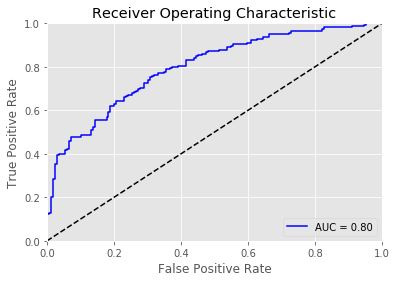

In [222]:
fpr, tpr, thresholds = roc_curve(test['team1_win'].values, test['prob'].values)
roc_auc = auc(fpr, tpr)
plot_roc(fpr, tpr, roc_auc)

In [223]:
roc_auc_score(test['team1_win'].values, test['prob'].values)


0.7969876277568585

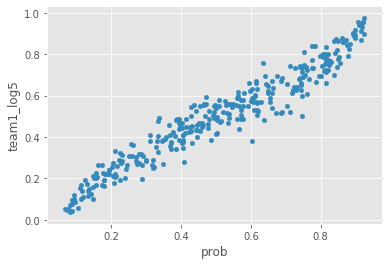

In [261]:
test.plot(kind='scatter', x='prob',y='team1_log5')

## Probit model

In [233]:
from statsmodels.discrete.discrete_model import Probit


In [234]:
model = Probit(y2, x2.astype(float))
probit_model = model.fit()
print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.565708
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:              team1_win   No. Observations:                  778
Model:                         Probit   Df Residuals:                      771
Method:                           MLE   Df Model:                            6
Date:                Thu, 17 Feb 2022   Pseudo R-squ.:                  0.1835
Time:                        19:04:57   Log-Likelihood:                -440.12
converged:                       True   LL-Null:                       -539.06
Covariance Type:            nonrobust   LLR p-value:                 5.364e-40
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
team1_log5         0.0727      0.097      0.746      0.455      -0.118       0.263
seed_diff        

## Random Forest

In [224]:
mm_train2 = pd.concat([mm_data_5, mm_data_4]).reset_index(drop=True)

In [225]:
train2, test2 = train_test_split(mm_train2, train_size= .7)


In [226]:
train2 = train2.reset_index(drop=True)
test2 = test2.reset_index(drop=True)

In [227]:
train2.groupby('team1_win')['team1_log5'].mean()

team1_win
0    0.384714
1    0.609557
Name: team1_log5, dtype: float64

In [228]:

x2=train2[['team1_log5', 'seed_diff', 'diff_fg2pct', 'diff_blockpct', 'diff_oppfg2pct', 'diff_oppfg3pct', 'diff_ftrate']]
y2 = train2['team1_win']

1. game_id (0.237828)
2. season (0.164439)
3. exp_win1 (0.146983)
4. team1_win (0.129575)
5. team1_score (0.114753)
6. exp_win2 (0.107497)
7. team2_score (0.098925)


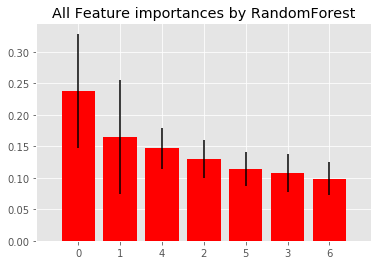

In [229]:
forest2 = RandomForestClassifier(n_estimators = 100)





forest2.fit(x2, y2)

importances_allfeatures2 = forest2.feature_importances_
#importances_allfeatures[:10]

std2 = np.std([tree.feature_importances_ for tree in forest2.estimators_],
             axis=0)
indices2 = np.argsort(importances_allfeatures2)[::-1]
for f in range(x2.shape[1]):
    print("%d. %s (%f)" % (f + 1, train2.columns[indices2[f]], importances_allfeatures2[indices2[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("All Feature importances by RandomForest")
plt.bar(range(x2.shape[1]), importances_allfeatures2[indices2],
       color="r", yerr=std2[indices2], align="center")
plt.xticks(range(x2.shape[1]), indices2)
plt.xlim([-1, x2.shape[1]])
plt.show()

accuracy_RF2 = cross_val_score(forest2,x2,y2,scoring = 'accuracy')
log_loss_RF2 = cross_val_score(forest2,x2,y2,scoring = 'neg_log_loss')


In [230]:
print("Accuracy: ", (accuracy_RF2.mean(), accuracy_RF2.std() * 2))
print("Log Loss: ", (log_loss_RF2.mean(), log_loss_RF2.std() * 2))

Accuracy:  (0.7197435897435897, 0.059250876935605976)
Log Loss:  (-0.5131840610286945, 0.05332349302882744)


In [191]:
#test2['prob'] = forest2.predict_proba(test[['team1_log5','seed_diff', 'diff_fg2pct', 'diff_blockpct', 'diff_oppfg2pct', 'diff_oppfg3pct']])
forest2
#test2['prediction'] = forest2.predict(test[['team1_log5','seed_diff', 'diff_fg2pct', 'diff_blockpct', 'diff_oppfg2pct', 'diff_oppfg3pct']])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Random Forest


In [142]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [143]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

from sklearn.utils import shuffle
from sklearn.metrics import log_loss, accuracy_score

from sklearn.feature_selection import RFECV
from sklearn import preprocessing
from sklearn.decomposition import PCA, KernelPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)


In [122]:
from sklearn.model_selection import cross_validate


In [116]:
from sklearn.model_selection import cross_val_score

In [125]:
from sklearn.model_selection.cross_validate import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.utils import shuffle

ModuleNotFoundError: No module named 'sklearn.model_selection.cross_validate'

In [153]:
from sklearn.metrics import log_loss, accuracy_score


In [168]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn import preprocessing

In [91]:
mm_data4 = mm_data_3

In [93]:
%time

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 16 µs


In [ ]:
train[['seed_diff', 'diff_fg2pct', 'diff_blockpct', 'diff_oppfg2pct', 'diff_oppfg3pct']], y=train['team1_win'])


In [118]:
X = train[['seed_diff', 'diff_fg2pct', 'diff_blockpct', 'diff_oppfg2pct', 'diff_oppfg3pct']]
Y =train['team1_win']


In [154]:
sklearn.metrics.SCORERS.keys()

<IPython.core.display.Javascript object>

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs
1. game_id (0.313575)
2. exp_win2 (0.189982)
3. season (0.173038)
4. exp_win1 (0.162551)
5. team1_win (0.160854)


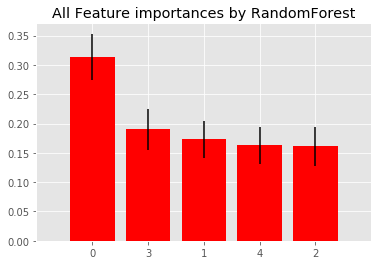

In [157]:
%time
forest = RandomForestClassifier(n_estimators = 100)





forest.fit(X=train[['seed_diff', 'diff_fg2pct', 'diff_blockpct', 'diff_oppfg2pct', 'diff_oppfg3pct']], y=train['team1_win'])

importances_allfeatures = forest.feature_importances_
#importances_allfeatures[:10]

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances_allfeatures)[::-1]
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, train.columns[indices[f]], importances_allfeatures[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("All Feature importances by RandomForest")
plt.bar(range(X.shape[1]), importances_allfeatures[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

accuracy_RF = cross_val_score(forest,X,Y,scoring = 'accuracy')
log_loss_RF = cross_val_score(forest,X,Y,scoring = 'neg_log_loss')


In [158]:
print("Accuracy: ", (accuracy_RF.mean(), accuracy_RF.std() * 2))
print("Log Loss: ", (log_loss_RF.mean(), log_loss_RF.std() * 2))


Accuracy:  (0.7159305210918114, 0.08504680015900329)
Log Loss:  (-0.5349772510852756, 0.0709565837067633)


## Linear SVM

In [171]:
svc = SVC(kernel="linear",probability=True)
# The "accuracy" scoring is proportional to the number of correct
# classifications
scores_svc = cross_val_score(svc,X,Y,cv=15,scoring = 'accuracy')
svc.fit(X,Y)
svc.predict_proba(X)
scores_svc.mean()

0.7186023127199598

In [172]:
X

,seed_diff,diff_fg2pct,diff_blockpct,diff_oppfg2pct,diff_oppfg3pct
0,-15,6.546000,8.032500,6.69250,1.868700
1,-3,-3.446540,0.555019,4.25917,-0.801245
2,9,-5.538000,-8.663700,-2.51840,0.229400
3,1,2.923700,-3.157700,-4.27000,-0.656700
4,15,5.797600,5.005700,8.02400,0.391600
...,...,...,...,...,...
773,-7,-5.897461,7.761397,1.63728,5.312340
774,5,2.547700,0.959200,4.86180,0.207600
775,5,-2.173400,0.887900,1.96220,4.818900
776,1,3.159900,4.667100,2.09680,3.416200


## Linear Support Vector Classifier + log5

In [198]:
x2

,team1_log5,seed_diff,diff_fg2pct,diff_blockpct,diff_oppfg2pct,diff_oppfg3pct
0,0.587740,1,1.029100,7.714900,4.68450,-0.850800
1,0.566220,-1,1.774100,-0.965000,-2.97630,1.117500
2,0.896025,-13,3.368400,-3.593200,-4.21030,-0.618600
3,0.340080,0,-6.023977,1.078783,-2.16657,-3.596157
4,0.982148,-15,9.790900,-4.405000,-0.62910,0.140100
...,...,...,...,...,...,...
717,0.154512,8,1.200100,-1.444800,0.27810,0.452800
718,0.640873,-7,-0.889900,-1.230100,-3.85380,3.178700
719,0.388442,3,3.255300,-2.516200,2.48910,-0.182400
720,0.799135,-7,4.313100,8.418100,7.45180,3.122900


In [231]:
svc2 = SVC(kernel="linear",probability=True)
# The "accuracy" scoring is proportional to the number of correct
# classifications
scores_svc2 = cross_val_score(svc2,x2,y2,cv=15,scoring = 'accuracy')
svc.fit(x2,y2)
svc.predict_proba(x2)
scores_svc2.mean()

0.6953494218200099

In [232]:
scores_svc3 = cross_val_score(svc2,x2,y2,cv=15,scoring = 'neg_log_loss')
scores_svc3.mean()

-0.5670545762981589

## Ensemble Model

In [269]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
clf1 = LogisticRegression()
clf2 = GaussianNB()
clf3 = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
clf4 = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0,max_depth=1, random_state=0)
eclf = VotingClassifier(estimators=[('Logit', clf1), ('gnb', clf2), ('SVC', clf3), ('GB', clf4)], voting='soft', weights=[0.9,0.888,0.883,0.875])

params = {'SVC__degree': [1, 10],'GB__n_estimators':[1000,2000]}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(x2,y2)

In [ ]:
## text blob, lm, bingli

In [270]:
grid.score(x2,y2)

0.9113110539845758

In [271]:
log_loss_grid = cross_val_score(grid,x2,y2,scoring = 'neg_log_loss')


In [278]:
log_loss_grid.mean()

-0.5748770122119365

## Naive Bayes

In [273]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x2, y2)

GaussianNB(priors=None, var_smoothing=1e-09)

In [275]:
gnb.predict(x2)
#gnb.predict(test['team1_win'].values)
gnb.score(x2,y2)

0.7095115681233933

In [277]:
log_loss_naive = cross_val_score(gnb,x2,y2,scoring = 'neg_log_loss')
log_loss_naive.mean()

-0.6334241665668129